## Técnicas de Programação I - Pandas

Na aula de hoje iremos explorar os seguintes tópicos:

- Pandas


## 1) Pandas

O **Pandas** é uma das bibliotecas mais usadas em data science.

Esta biblioteca, construída a partir do Numpy, possibilita a estruturação e manipulação de dados de maneira simples e eficiente.

Comos os dados são a matéria prima de todo projeto de data science, manipulá-los é fundamental! Por isso, utilizaremos o Pandas em quase todas as aulas daqui pra frente!

Para entendermos melhor o pandas e passar a utilizá-lo, precisamos entender suas estruturas fundamentais: as **Series** e o **DataFrame**.

Começamos importando o pandas:

In [1]:
# importando o pandas
import numpy as np
import pandas as pd

### Series

O objeto fundamental do Pandas são as **Series**, uma classe do pandas.

As Series são as **colunas das tabelas** (que veremos mais a frente), e por baixo dos panos, os dados ficam armazenados como **numpy arrays**!

A diferença é que a série possui um **índice associado**, permitindo o acesso aos conteúdos dessa estrutura por ele, como um dicionário.

Além disso, as séries têm métodos específicos além dos que vimos pra arrays, o que será super útil!

Podemos criar uma série **a partir de uma lista**, usando a função do pandas `pd.Series()`: 

In [33]:
# Criando uma lista de valores
lista = [4, 6, 3, 7, 13]
print("lista", lista)
# Criando um array a partir dessa lista
arr = np.array(lista)
print("arr", arr)

lista [4, 6, 3, 7, 13]
arr [ 4  6  3  7 13]


In [34]:
# Criando uma série
serie = pd.Series(lista)
print(type(serie))
serie

<class 'pandas.core.series.Series'>


0     4
1     6
2     3
3     7
4    13
dtype: int64

In [9]:
# Pegando os valores, note que é retornando um numpy array
serie.values

array([ 4,  6,  3,  7, 13])

Por padrão (default) os indices criados são númericos, entretanto podemos colocar o valor que quisermos, similar as chaves (keys) do dicionário!

In [10]:
# Pegando os indices
serie.index

RangeIndex(start=0, stop=5, step=1)

In [12]:
print(range(0, 5, 1))
list(range(0, 5, 1))

range(0, 5)


[0, 1, 2, 3, 4]

In [14]:
# Transformando em lista
print(serie.index.tolist())

# Ou podemos utilizar o list
print(list(serie.index))

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


**Drops**

Crie uma série cujos valores são o dobro do indice, sendo que o indice varie de 0 a 10.
```
0: 0
1: 2
2: 4
...
10: 20
```

Imprima na tela os 3 primeiros valores da serie (head) e os 3 últimos (tail).

Além disso imprima os valores da série e os seus indices

In [35]:
arr = np.arange(0, 11) * 2
serie_drops = pd.Series(arr)

print(serie_drops.head(3)) # três primeiros valores

print(serie_drops.tail(3)) # três últimos valores

print(serie_drops.values) # Valores da série

print(serie_drops.index.tolist()) # Indices da série

0    0
1    2
2    4
dtype: int64
8     16
9     18
10    20
dtype: int64
[ 0  2  4  6  8 10 12 14 16 18 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Podemos selecionar um ou mais valores da série.  
Há diversas formas de realizar essa operação! 

- `df[<nome>]`
- `df.values[<posição>]`
- `df.loc[<nome>]`
- `df.iloc[<posição>]`

**Prefira sempre utilizar o `loc` ou `iloc`** para evitar possíveis erros

In [36]:
serie

0     4
1     6
2     3
3     7
4    13
dtype: int64

In [37]:
# Pegando um valor a partir do indice
serie[2]

3

In [38]:
# Similar podemos:
serie.values[2]

3

In [39]:
# As séries parecem dicionarios
dic = {
    0: 42,
    1: 50,
    'a': 32
}
print(dic)
print(dic.values())
print(dic.keys())
print(dic[1])
print(dic.get(1))

{0: 42, 1: 50, 'a': 32}
dict_values([42, 50, 32])
dict_keys([0, 1, 'a'])
50
50


In [41]:
serie

0     4
1     6
2     3
3     7
4    13
dtype: int64

In [43]:
lista

[4, 6, 3, 7, 13]

In [61]:
# Podemos dar outros nomes para o indice!
# Similar aos dicionários
indices = ['a', 'b', 'c', 'd', 'e']

serie2 = pd.Series(data=lista, index=indices)
serie2

a     4
b     6
c     3
d     7
e    13
dtype: int64

In [62]:
serie2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [63]:
# Conseguimos acessa pelo número
serie2[2]

3

In [64]:
# Ou pelo nome do indice
serie2['c']

3

In [65]:
# Note que fizemos acima só é possível apenas quando o indice nomeado são strings
# Caso fosse númerico, teriamos
indices = list(range(5, 10))
serie3 = pd.Series(data=lista, index=indices)
display(serie3)
print(serie3.index)

# Um erro ocorre! O número não faz das parte dos indices
serie3[2]

5     4
6     6
7     3
8     7
9    13
dtype: int64

Int64Index([5, 6, 7, 8, 9], dtype='int64')


KeyError: ignored

In [67]:
# Note que o erro foi KeyError!
print(dic)
# O mesmo erro ocorre com dicionários!
dic[2]

{0: 42, 1: 50, 'a': 32}


KeyError: ignored

In [68]:
# Podemos fatiar as series
serie[2:]

2     3
3     7
4    13
dtype: int64

In [71]:
# Fatiando com indices nomeados
serie2['c':]

c     3
d     7
e    13
dtype: int64

In [73]:
# Pegando um único elemento com o `loc`
serie2.loc['c']

3

In [76]:
# Fatiando com o `loc`
serie2.loc['c':]

c     3
d     7
e    13
dtype: int64

In [77]:
# Fatiando com o `loc`, note que o loc é inclusivo!
# Pega o elemento depois dos `:`!
serie2.loc['c' : 'd']

c    3
d    7
dtype: int64

In [78]:
# Como as vezes queremos um valor posicional e não nominal
# O pandas oferece o `iloc` que pega o valor não pelo nome do indice
# e sim pela sua posição
serie2.iloc[2:]

c     3
d     7
e    13
dtype: int64

Outra forma bem natural de construir séries é apartir de um **dicionário**

Neste caso, as **chaves** se tornam as labels de índice!

In [79]:
dic

{0: 42, 1: 50, 'a': 32}

In [80]:
pd.Series(dic)

0    42
1    50
a    32
dtype: int64

In [81]:
dic = {
    'a': 12,
    'b': 13,
    'd': 42,
    'g': 51
}
pd.Series(dic)

a    12
b    13
d    42
g    51
dtype: int64

In [84]:
# Por trás ocorre a seguinte operação com dicionários
pd.Series(data=dic.values(), index=dic.keys())

a    12
b    13
d    42
g    51
dtype: int64

**Drops**

Crie uma série cujos valores variem de 0 até k. Sendo que $k=10$

O indice da série será o valor de k*2 e o seu valor k^2 (k ao quadrado).

Por exemplo:
```
k  idx valor
0   0    0
1   2    1
2   4    4
...
10  20   100
```

Imprima na tela os 3 primeiros valores da serie (head) e os 3 últimos (tail).

Além disso imprima os valores da série e os seus indices.

Utilize o loc ou iloc para selecionar os valores de k=3 entre k=6.

In [92]:
k = 10
dc = {x*2: x**2 for x in range(0, k+1)}
serie_drops2 = pd.Series(dc)
print('Serie')
display(serie_drops2)

print('Head')
display(serie_drops2.head(3)) # três primeiros valores
print('Tail')
display(serie_drops2.tail(3)) # três últimos valores
print('Valores')
display(serie_drops2.values) # Valores da série
print('Indices')
display(serie_drops2.index.tolist()) # Indices da série

print('<iloc> k: 3 e 6')
display(serie_drops2.iloc[3:7])

print('<loc> k: 3 e 6')
display(serie_drops2.loc[6:12])

Serie


0       0
2       1
4       4
6       9
8      16
10     25
12     36
14     49
16     64
18     81
20    100
dtype: int64

Head


0    0
2    1
4    4
dtype: int64

Tail


16     64
18     81
20    100
dtype: int64

Valores


array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

Indices


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

<iloc> k: 3 e 6


6      9
8     16
10    25
12    36
dtype: int64

<loc> k: 3 e 6


6      9
8     16
10    25
12    36
dtype: int64

### Operações
Ao fazer operações com séries, os valores são alterados um a um, exatamente como vimos com os numpy arrays!

In [96]:
# Criando uma lista de valores
lista = [4, 6, 3, 7, 13]
print("lista", lista)
# Criando um array a partir dessa lista
arr = np.array(lista)
print("arr", arr)
# Criando uma série
serie = pd.Series(lista)
print(type(serie))
serie

lista [4, 6, 3, 7, 13]
arr [ 4  6  3  7 13]
<class 'pandas.core.series.Series'>


0     4
1     6
2     3
3     7
4    13
dtype: int64

In [97]:
arr

array([ 4,  6,  3,  7, 13])

In [98]:
arr + 5 

array([ 9, 11,  8, 12, 18])

Somando um valor elemento por elemento da série

In [99]:
serie

0     4
1     6
2     3
3     7
4    13
dtype: int64

In [100]:
serie + 5

0     9
1    11
2     8
3    12
4    18
dtype: int64

Divisão, múltiplicação, etc

In [101]:
serie / 5

0    0.8
1    1.2
2    0.6
3    1.4
4    2.6
dtype: float64

In [102]:
serie * 10

0     40
1     60
2     30
3     70
4    130
dtype: int64

In [103]:
serie ** 2

0     16
1     36
2      9
3     49
4    169
dtype: int64

In [104]:
np.log(serie)

0    1.386294
1    1.791759
2    1.098612
3    1.945910
4    2.564949
dtype: float64

### Mascaras

Similar ao numpy, podemos gerar mascaras para filtrar os dados

In [116]:
print(arr)
print(arr % 2 != 0)
arr[arr % 2 != 0]

[ 4  6  3  7 13]
[False False  True  True  True]


array([ 3,  7, 13])

In [117]:
list(filter(lambda x: x % 2 != 0, arr))

[3, 7, 13]

In [118]:
# Adicionar um parentêses não é obrigatório mas auxilia na leitura
mascara = (serie % 2 != 0)

In [119]:
mascara

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [120]:
# Filtrando apenas valores verdadeiros para a mascara
serie[mascara]

2     3
3     7
4    13
dtype: int64

In [122]:
# Podemos utilizar o `filter`! Mas perdemos o indice!
# O indice é MUITO importante
pd.Series(list(filter(lambda x: x%2 !=0, serie)))

0     3
1     7
2    13
dtype: int64

In [123]:
mascara2 = (serie < 6)
mascara2

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [124]:
serie[mascara2]

0    4
2    3
dtype: int64

In [127]:
# Podemos utilizar múltiplas condições
# Operador `and`
display(serie[mascara & mascara2])

# Operador `or`
display(serie[mascara | mascara2])

2    3
dtype: int64

0     4
2     3
3     7
4    13
dtype: int64

### Operações entre séries

Similar aos arrays, conseguimos realizar operações entre series.

Seria como manipular dois vetores (unidimensional) no numpy

In [128]:
lista1 = [4, 6, 3, 7, 25]
lista2 = [21, 31, 98, 65, 42]
arr1 = np.array(lista1)
arr2 = np.array(lista2)
s2 = pd.Series(lista1)
s1 = pd.Series(lista2)

In [129]:
s1

0    21
1    31
2    98
3    65
4    42
dtype: int64

In [130]:
s2

0     4
1     6
2     3
3     7
4    25
dtype: int64

In [131]:
arr1 + arr2

array([ 25,  37, 101,  72,  67])

In [132]:
s1 + s2

0     25
1     37
2    101
3     72
4     67
dtype: int64

In [133]:
np.random.seed(42)

a1 = np.random.randint(0, 100, 7)
a2 = np.random.randint(0, 100, 5)
print(a1)
print(a2)
s1 = pd.Series(a1)
s2 = pd.Series(a2)

[51 92 14 71 60 20 82]
[86 74 74 87 99]


In [135]:
a1 + a2

ValueError: ignored

In [137]:
# Primeira diferença, podemos somar series de tamanho diferentes
# Mas retorna um valor `NaN` (Not a Number) para os valores faltantes
# na série de menor tamanho
s1 + s2

0    137.0
1    166.0
2     88.0
3    158.0
4    159.0
5      NaN
6      NaN
dtype: float64

In [144]:
# Podemos corrigir esse comportamento com o método `add`
# Adicionamos o `fill_value` sendo o valor
# a ser preenchido nas células que faltam o valor
s1.add(s2, fill_value=0)

0    137.0
1    166.0
2     88.0
3    158.0
4    159.0
5     20.0
6     82.0
dtype: float64

In [145]:
# O mesmo ocorre para outras operações
s1 * s2

0    4386.0
1    6808.0
2    1036.0
3    6177.0
4    5940.0
5       NaN
6       NaN
dtype: float64

In [147]:
s1.multiply(s2, fill_value=1)

0    4386.0
1    6808.0
2    1036.0
3    6177.0
4    5940.0
5      20.0
6      82.0
dtype: float64

In [148]:
s1 / s2

0    0.593023
1    1.243243
2    0.189189
3    0.816092
4    0.606061
5         NaN
6         NaN
dtype: float64

In [149]:
s1.divide(s2, fill_value=1)

0     0.593023
1     1.243243
2     0.189189
3     0.816092
4     0.606061
5    20.000000
6    82.000000
dtype: float64

Operações são baseadas no indice!

In [154]:
t1 = pd.Series({
    1: 10,
    2: 30,
    4: 20,
    5: 100
})
t2 = pd.Series({
    1: 6,
    100: 1000,
    200: 300
})

In [155]:
t1

1     10
2     30
4     20
5    100
dtype: int64

In [156]:
t2

1         6
100    1000
200     300
dtype: int64

In [158]:
# As operações são baseadas nos indices
# Somente os indices iguais serão somadas
t1 + t2

1      16.0
2       NaN
4       NaN
5       NaN
100     NaN
200     NaN
dtype: float64

In [161]:
# Alterando o nome dos indices
t1.index = [0, 1, 2, 3]
t2.index = np.arange(0, t2.shape[0])

In [162]:
display(t1)
display(t2)

0     10
1     30
2     20
3    100
dtype: int64

0       6
1    1000
2     300
dtype: int64

In [163]:
t1 + t2

0      16.0
1    1030.0
2     320.0
3       NaN
dtype: float64

### Outras funcionalidades
Há vários outros métodos muito úteis para séries!

Os principais são:

In [164]:
np.random.seed(42)

notas = pd.Series(np.random.randint(0, 11, 30))

In [165]:
arr_notas = notas.values

In [166]:
arr_notas

array([ 6,  3, 10,  7,  4,  6,  9,  2,  6, 10, 10,  7,  4,  3,  7,  7,  2,
        5,  4,  1,  7,  5,  1,  4,  0,  9,  5,  8,  0, 10])

In [169]:
mascara = arr_notas >= 0

In [170]:
arr_notas[mascara]

array([ 6,  3, 10,  7,  4,  6,  9,  2,  6, 10, 10,  7,  4,  3,  7,  7,  2,
        5,  4,  1,  7,  5,  1,  4,  0,  9,  5,  8,  0, 10])

In [173]:
arr_notas[(notas < 5) & (mascara)]

array([3, 4, 2, 4, 3, 2, 4, 1, 1, 4, 0, 0])

In [176]:
mascara3 = (notas < 5) & (mascara)
notas_vermelhas = arr_notas[mascara3]
notas_vermelhas

array([3, 4, 2, 4, 3, 2, 4, 1, 1, 4, 0, 0])

In [183]:
mascara_notas_vermelhas = (notas < 5) & (notas >= 0)
notas_vermelhas_serie = notas[mascara_notas_vermelhas]
notas_vermelhas_serie

1     3
4     4
7     2
12    4
13    3
16    2
18    4
19    1
22    1
23    4
24    0
28    0
dtype: int64

In [186]:
# Utilizamos o ~ para pegar a negativa das mascara
notas_azuis = notas[~mascara_notas_vermelhas]
notas_azuis

0      6
2     10
3      7
5      6
6      9
8      6
9     10
10    10
11     7
14     7
15     7
17     5
20     7
21     5
25     9
26     5
27     8
29    10
dtype: int64

In [189]:
# Podemos somar com o sum
print(sum(notas_azuis))

# Ou podemos o utilizar o `sum` método do pandas
print(notas_azuis.sum())

134
134


In [203]:
# Contando o número de notas azuis
qtd_notas_azuis = notas_azuis.shape[0]
print('Com shape')
print(qtd_notas_azuis)
print('-'*32)

mascara_notas_azuis = ~mascara_notas_vermelhas
print(mascara_notas_azuis.head(3))
print('-'*32)
print(sum(mascara_notas_azuis))

print(mascara_notas_azuis.sum())

Com shape
18
--------------------------------
0     True
1    False
2     True
dtype: bool
--------------------------------
18
18


**Aplicando uma função para cada valor da série**

In [205]:
# Utilizando compreensão de listas
lista_valores = [1, 2, 3, 4]
print(lista_valores)
serie = pd.Series(lista_valores)

eleva_quad = lambda x: x ** 2

[eleva_quad(valor) for valor in lista_valores]

[1, 2, 3, 4]


[1, 4, 9, 16]

In [207]:
# Na série podemos aplicar (`apply`) uma função para cada valor
# <series>.apply(<funcao>)
serie.apply(eleva_quad)

0     1
1     4
2     9
3    16
dtype: int64

In [208]:
def operacao_estranha(n):
  return n**2 + n*30 - 20

In [209]:
serie.apply(operacao_estranha)

0     11
1     44
2     79
3    116
dtype: int64

In [210]:
# Podemos utilizar condicionais!
notas.apply(lambda nota: 'par' if nota % 2 ==0 else 'impar')

0       par
1     impar
2       par
3     impar
4       par
5       par
6     impar
7       par
8       par
9       par
10      par
11    impar
12      par
13    impar
14    impar
15    impar
16      par
17    impar
18      par
19    impar
20    impar
21    impar
22    impar
23      par
24      par
25    impar
26    impar
27      par
28      par
29      par
dtype: object

In [214]:
# Criando um filtro/mascara utilizando o apply
is_passou = notas.apply(lambda nota: True if nota >= 5 else False)
is_passou

0      True
1     False
2      True
3      True
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20     True
21     True
22    False
23    False
24    False
25     True
26     True
27     True
28    False
29     True
dtype: bool

In [216]:
# Filtrando os dados com a mascara `is_passou`
notas[is_passou]

0      6
2     10
3      7
5      6
6      9
8      6
9     10
10    10
11     7
14     7
15     7
17     5
20     7
21     5
25     9
26     5
27     8
29    10
dtype: int64

**Podemos acessar medidas centrais**

In [225]:
print(notas.max())
print(notas.min())
print(notas.mean())
print(notas.std())
# Podemos pegar os quantis
print(np.quantile(notas, 0.25))
print(np.quantile(notas, 0.50)) # print(notas.median())
print(np.quantile(notas, 0.75))


10
0
5.4
3.058058883986872
3.25
5.5
7.0


In [226]:
# Facilitando a vida com a estatística descritiva!
notas.describe()

count    30.000000
mean      5.400000
std       3.058059
min       0.000000
25%       3.250000
50%       5.500000
75%       7.000000
max      10.000000
dtype: float64

In [235]:
# O describe retorna uma série, caso a entrada seja uma série
type(notas.describe())

pandas.core.series.Series

In [237]:
# Pegando a mediana
notas.describe()['50%']

5.5

### Ordenando os valores `sort_values`

In [229]:
notas.sort_values()

24     0
28     0
22     1
19     1
16     2
7      2
1      3
13     3
12     4
18     4
23     4
4      4
21     5
26     5
17     5
8      6
5      6
0      6
20     7
14     7
11     7
3      7
15     7
27     8
6      9
25     9
10    10
9     10
2     10
29    10
dtype: int64

In [232]:
# Ordenando do maior para o menor
notas.sort_values(ascending=False)

29    10
10    10
2     10
9     10
25     9
6      9
27     8
20     7
14     7
11     7
15     7
3      7
8      6
5      6
0      6
17     5
21     5
26     5
18     4
12     4
23     4
4      4
1      3
13     3
7      2
16     2
19     1
22     1
24     0
28     0
dtype: int64

#### Valores únicos

In [238]:
# Retorna os valores únicos do array/series
notas.unique()

array([ 6,  3, 10,  7,  4,  9,  2,  5,  1,  0,  8])

In [239]:
# Retorna a quantidade de valores únicos do array/series
notas.nunique()

11

#### Contagem de valores `value_counts`

In [241]:
# Número de ocorrências de cada valor único
# Frequência absoluta
notas.value_counts()

7     5
10    4
4     4
6     3
5     3
3     2
9     2
2     2
1     2
0     2
8     1
dtype: int64

In [243]:
# Frequência relativa
notas.value_counts() / notas.size

7     0.166667
10    0.133333
4     0.133333
6     0.100000
5     0.100000
3     0.066667
9     0.066667
2     0.066667
1     0.066667
0     0.066667
8     0.033333
dtype: float64

In [244]:
# Frequência relativa
notas.value_counts(normalize=True)

7     0.166667
10    0.133333
4     0.133333
6     0.100000
5     0.100000
3     0.066667
9     0.066667
2     0.066667
1     0.066667
0     0.066667
8     0.033333
dtype: float64

In [245]:
def formata_porcentagem(x):
    return f'{(x*100):.2f}%'

In [246]:
formata_porcentagem(1.1)

'110.00%'

**Podemos criar `pipelines` de processamento!**

In [249]:
(notas
 .value_counts(normalize=True)
 .apply(formata_porcentagem))

7     16.67%
10    13.33%
4     13.33%
6     10.00%
5     10.00%
3      6.67%
9      6.67%
2      6.67%
1      6.67%
0      6.67%
8      3.33%
dtype: object

**Drops**

Imagine que você trabalhe num restaurante. Durante o dia, diversas gorjetas são pagas pelas pessoas clientes. No restaurante, você decide compreender o comportamento das pessoas clientes, que são as boas pagadoras de gorjeta e quem paga menos, quais os melhores dias e turnos que essas ocorrem.

Primeiramente precisamos realizar o carregamento do arquivo e observar quais valores temos, portanto:
- Leia o arquivo `tips`.
- Filtre os dados cujo sexo seja feminino/masculino
- Descubra a média de gorjeta e conta total por sexo
- Descubra o desvio padrão de cada conta por sexo
- Crie duas variáveis uma para cada sexo
  - Ordene os valores da grojeta da maior para menor para cada sexo
- Mostre a frequência relativa da gorjeta por sexo

**Soma cumulativa**

In [250]:
# Vamos observar a evolução da vacinação por dia!
np.random.seed(0)
total_pop = 50_000
vacinacao = np.random.normal(600, 200, 60) +  np.random.normal(200, 100, 60) * np.cos(np.arange(0, 60))

serie_vacinacao = pd.Series(vacinacao).astype(int)

In [251]:
serie_vacinacao

0     1085
1      768
2      746
3     1021
4      831
5      449
6      825
7      755
8      563
9      495
10     399
11     891
12    1017
13     693
14     721
15     566
16     790
17     519
18     774
19     632
20     123
21     571
22     526
23     426
24    1201
25     695
26     814
27     509
28     817
29     665
30     655
31     970
32     606
33     199
34     330
35     386
36     820
37    1130
38     725
39     603
40     131
41     251
42     229
43    1154
44     580
45     719
46     280
47     631
48      26
49     662
50     794
51     893
52     479
53       4
54     450
55     691
56     864
57     826
58     504
59     302
dtype: int64

In [252]:
serie_normalizada_vacinacao = serie_vacinacao / total_pop

In [253]:
serie_normalizada_vacinacao

0     0.02170
1     0.01536
2     0.01492
3     0.02042
4     0.01662
5     0.00898
6     0.01650
7     0.01510
8     0.01126
9     0.00990
10    0.00798
11    0.01782
12    0.02034
13    0.01386
14    0.01442
15    0.01132
16    0.01580
17    0.01038
18    0.01548
19    0.01264
20    0.00246
21    0.01142
22    0.01052
23    0.00852
24    0.02402
25    0.01390
26    0.01628
27    0.01018
28    0.01634
29    0.01330
30    0.01310
31    0.01940
32    0.01212
33    0.00398
34    0.00660
35    0.00772
36    0.01640
37    0.02260
38    0.01450
39    0.01206
40    0.00262
41    0.00502
42    0.00458
43    0.02308
44    0.01160
45    0.01438
46    0.00560
47    0.01262
48    0.00052
49    0.01324
50    0.01588
51    0.01786
52    0.00958
53    0.00008
54    0.00900
55    0.01382
56    0.01728
57    0.01652
58    0.01008
59    0.00604
dtype: float64

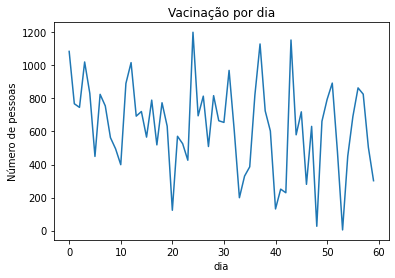

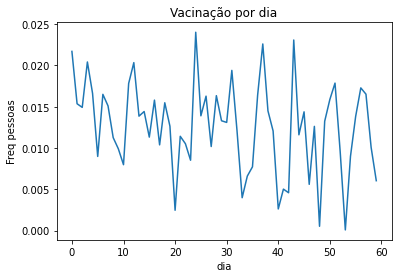

In [254]:
import matplotlib.pyplot as plt
serie_vacinacao.plot()
plt.title('Vacinação por dia')
plt.xlabel('dia')
plt.ylabel('Número de pessoas')
plt.show()
serie_normalizada_vacinacao.plot()
plt.title('Vacinação por dia')
plt.xlabel('dia')
plt.ylabel('Freq pessoas')
plt.show()


In [255]:
# Descrevendo a série de vacinação
serie_vacinacao.describe()

count      60.000000
mean      629.683333
std       274.767420
min         4.000000
25%       471.750000
50%       658.500000
75%       814.750000
max      1201.000000
dtype: float64

In [256]:
serie_normalizada_vacinacao.describe()

count    60.000000
mean      0.012594
std       0.005495
min       0.000080
25%       0.009435
50%       0.013170
75%       0.016295
max       0.024020
dtype: float64

In [259]:
serie_normalizada_vacinacao.head(5)

0    0.02170
1    0.01536
2    0.01492
3    0.02042
4    0.01662
dtype: float64

In [258]:
# Descobrindo o acumulado por dia
serie_nomalizado_vacinacao_cumulativo = serie_normalizada_vacinacao.cumsum()
serie_nomalizado_vacinacao_cumulativo

0     0.02170
1     0.03706
2     0.05198
3     0.07240
4     0.08902
5     0.09800
6     0.11450
7     0.12960
8     0.14086
9     0.15076
10    0.15874
11    0.17656
12    0.19690
13    0.21076
14    0.22518
15    0.23650
16    0.25230
17    0.26268
18    0.27816
19    0.29080
20    0.29326
21    0.30468
22    0.31520
23    0.32372
24    0.34774
25    0.36164
26    0.37792
27    0.38810
28    0.40444
29    0.41774
30    0.43084
31    0.45024
32    0.46236
33    0.46634
34    0.47294
35    0.48066
36    0.49706
37    0.51966
38    0.53416
39    0.54622
40    0.54884
41    0.55386
42    0.55844
43    0.58152
44    0.59312
45    0.60750
46    0.61310
47    0.62572
48    0.62624
49    0.63948
50    0.65536
51    0.67322
52    0.68280
53    0.68288
54    0.69188
55    0.70570
56    0.72298
57    0.73950
58    0.74958
59    0.75562
dtype: float64

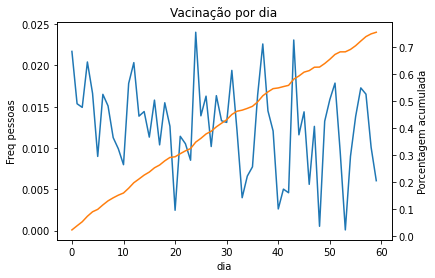

In [260]:
serie_normalizada_vacinacao.plot()
plt.title('Vacinação por dia')
plt.xlabel('dia')
plt.ylabel('Freq pessoas')

serie_nomalizado_vacinacao_cumulativo.plot(secondary_y=True)
plt.ylabel('Porcentagem acumulada')
plt.show()

In [263]:
serie_nomalizado_vacinacao_cumulativo

0     0.02170
1     0.03706
2     0.05198
3     0.07240
4     0.08902
5     0.09800
6     0.11450
7     0.12960
8     0.14086
9     0.15076
10    0.15874
11    0.17656
12    0.19690
13    0.21076
14    0.22518
15    0.23650
16    0.25230
17    0.26268
18    0.27816
19    0.29080
20    0.29326
21    0.30468
22    0.31520
23    0.32372
24    0.34774
25    0.36164
26    0.37792
27    0.38810
28    0.40444
29    0.41774
30    0.43084
31    0.45024
32    0.46236
33    0.46634
34    0.47294
35    0.48066
36    0.49706
37    0.51966
38    0.53416
39    0.54622
40    0.54884
41    0.55386
42    0.55844
43    0.58152
44    0.59312
45    0.60750
46    0.61310
47    0.62572
48    0.62624
49    0.63948
50    0.65536
51    0.67322
52    0.68280
53    0.68288
54    0.69188
55    0.70570
56    0.72298
57    0.73950
58    0.74958
59    0.75562
dtype: float64

**Desafio**

Temos uma meta de R$ 1.5 Mi, dado as vendas do ano:

- Quando a meta foi batida?
  - Lembre-se do cumsum, e mascaras
- Qual foi o dia de menor venda? Qual o valor?
  - Lembre-se do `argmin`
- Qual foi o dia de maior venda? Qual o valor?
  - Lembre-se do `argmax`
- Qual a média de vendas por dia?
- Qual o desvio padrão de vendas por dia?

Dica:
- Para o menor/maior dia de venda lembre-se do `argmin` e `argmax`, funções que retornam o indice que ocorreu tal fenômeno

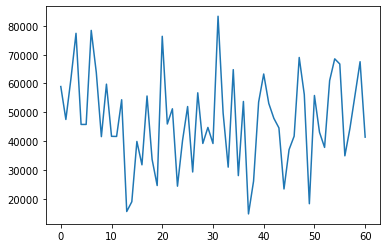

In [264]:
np.random.seed(42)
meta = 1.5*10**6
vendas = np.random.normal(50_000, 18000, 61)
serie_vendas = pd.Series(vendas).astype(int)
serie_vendas.plot()